In [1]:
%matplotlib inline
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

IMAGE_DIR = Path('../img/').resolve()


In [2]:
# plt.rcParams.update({
#     "axes.prop_cycle": plt.cycler("color", ['#000000', '#1b6989', '#e69f00', '#009e73', '#f0e442', '#50b4e9', '#d55e00', '#cc79a7']),
#     "figure.figsize": [12.0, 5.0],
#     "font.serif": ['Palatino',
#                    'Palatino Linotype',
#                    'Palatino LT STD',
#                    'Book Antiqua',
#                    'Georgia',
#                    'DejaVu Serif'],
#     'font.family': 'serif',
#     'figure.facecolor': '#fffff8',
#     'axes.facecolor': '#fffff8',
#     'figure.constrained_layout.use': True,
#     'font.size': 14.0,
#     'hist.bins': 'auto',
#     'lines.linewidth': 3.0,
#     'lines.markeredgewidth': 2.0,
#     'lines.markerfacecolor': 'none',
#     'lines.markersize': 8.0, 
# })

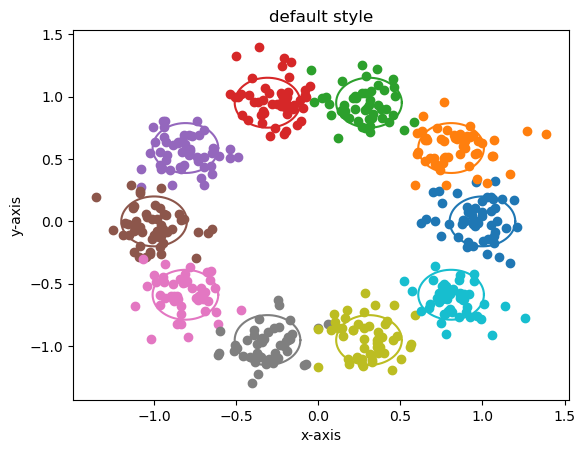

In [3]:
def plot_style(style):
    with plt.style.context(style):
        np.random.seed(2)
        fig, ax = plt.subplots()

        n_steps = len(plt.rcParams['axes.prop_cycle'].by_key()['color'])
        t = np.linspace(0, 2 * np.pi, 200)
        for idx in range(n_steps):
            theta =(2 * np.pi * idx) / n_steps
            mean = np.array([np.cos(theta), np.sin(theta)])

            ax.plot(0.2 * np.cos(t) + mean[0], 0.2 * np.sin(t) + mean[1], '-', color=f'C{idx}')
            ax.plot(*np.random.multivariate_normal(mean, 0.02 * np.eye(2), 50).T, 'o', color=f'C{idx}')
        ax.set_title(f"{style} style")
        ax.set_xlabel("x-axis")
        ax.set_ylabel("y-axis")
        fig.savefig(IMAGE_DIR / f'{style}.png', transparent=False)

plot_style('default')

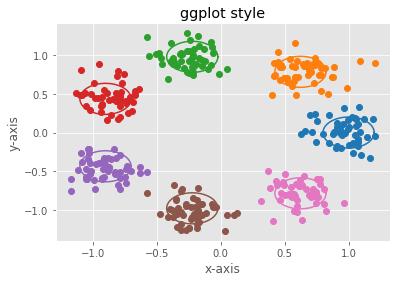

In [4]:
plot_style('ggplot')

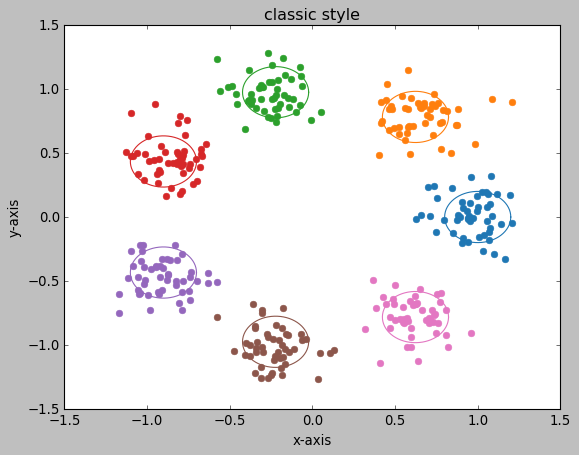

In [5]:
plot_style('classic')

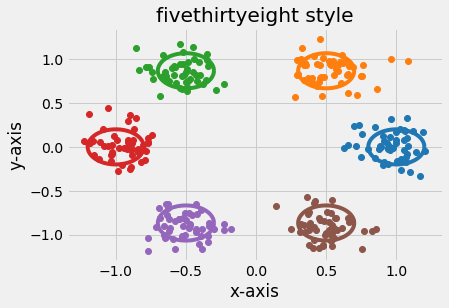

In [6]:
plot_style('fivethirtyeight')

In [7]:
#plot_style('tufte')

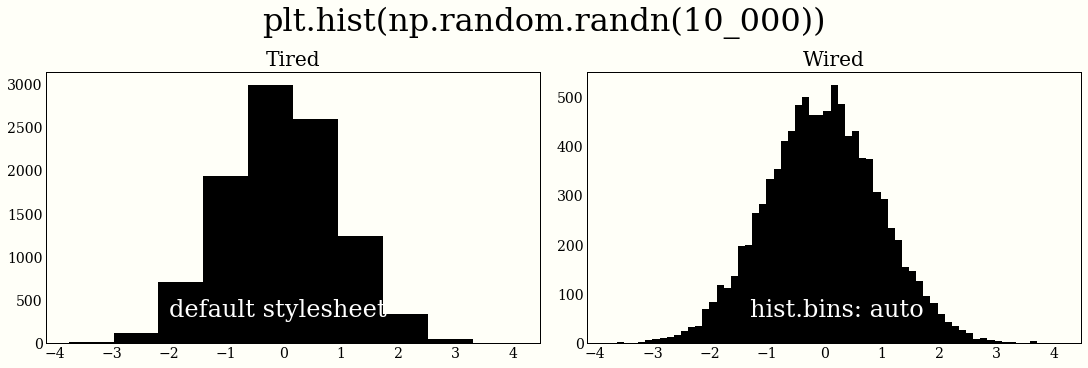

In [8]:
with plt.style.context("tufte"):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
    np.random.seed(3)
    data = np.random.randn(10_000)
    ax1.hist(data, bins=10)
    ax1.set_title("Tired")
    lo, hi = ax1.get_ylim()

    ax1.annotate("default stylesheet", xy=(-2., 0.1 * (lo + hi)), color='white', size=24)
    
    ax2.hist(data, bins="auto")
    ax2.set_title("Wired")
    lo, hi = ax2.get_ylim()
    ax2.annotate("hist.bins: auto", xy=(-1.3, 0.1 * (lo + hi)), color='white', size=24)
    fig.suptitle('plt.hist(np.random.randn(10_000))', fontsize=32)
    fig.savefig(IMAGE_DIR / 'bins.png')


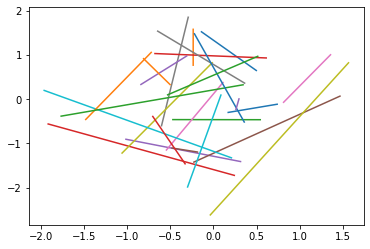

In [9]:
def our_usual_plot(filename):
    np.random.seed(42)
    fig, ax = plt.subplots()
    ax.plot(*np.random.randn(50, 2), clip_on=False)
    fig.savefig(IMAGE_DIR / filename)
    return ax

our_usual_plot('style1.png');

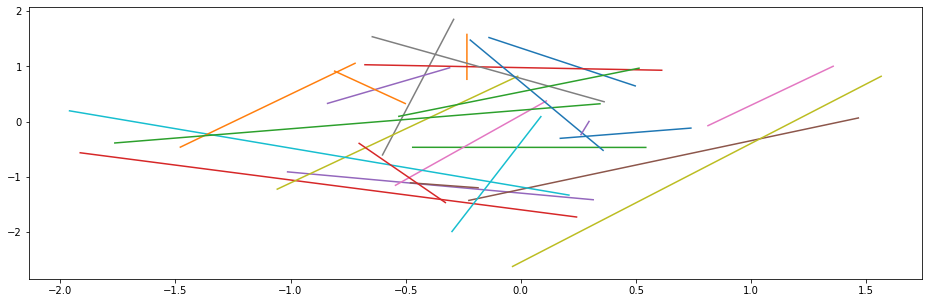

In [10]:
plt.rcParams.update({
    'figure.figsize': [16.0, 5.0],
})
our_usual_plot('style2.png');

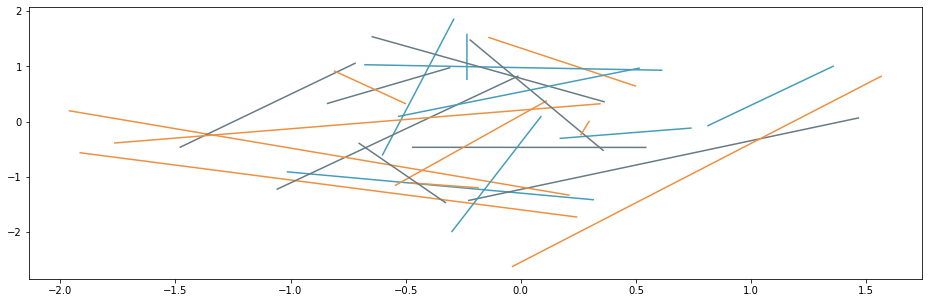

In [11]:
plt.rcParams.update({
    'axes.prop_cycle': plt.cycler(
        "color", 
        ['#EE9041', '#459DB9', '#667B83']),
})
our_usual_plot('style3.png');

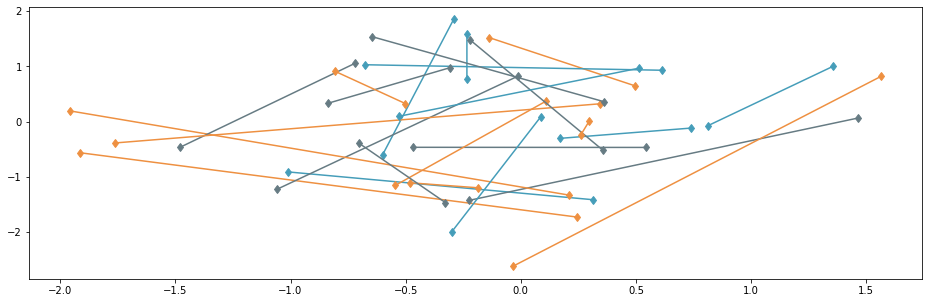

In [12]:
plt.rcParams.update({
    'lines.marker': 'd',
})
our_usual_plot('style4.png');

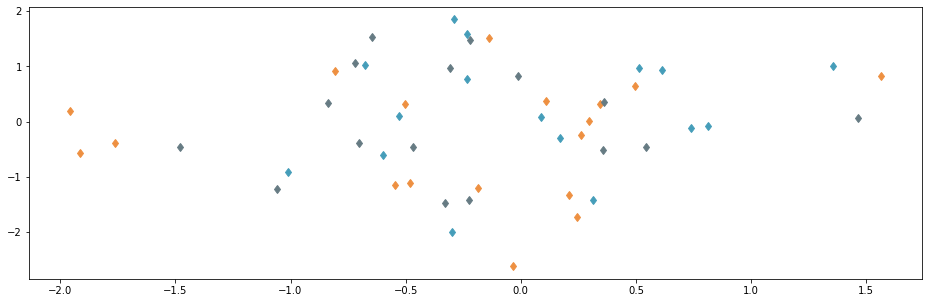

In [13]:
plt.rcParams.update({
    'lines.linestyle': '',
})

our_usual_plot('style5.png');

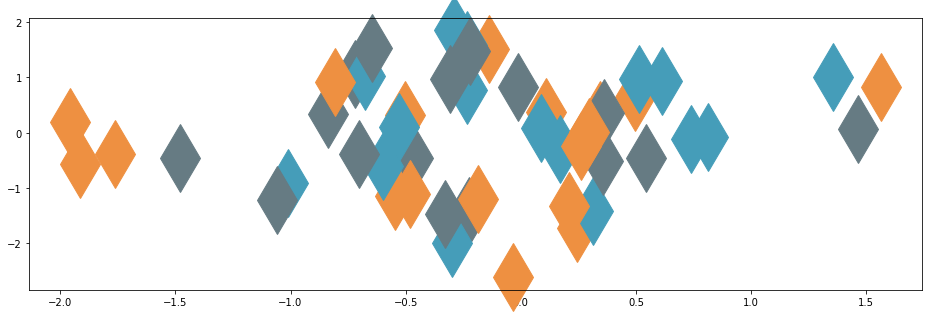

In [14]:
plt.rcParams.update({
    'lines.markersize': 48.0,
})

our_usual_plot('style6.png');

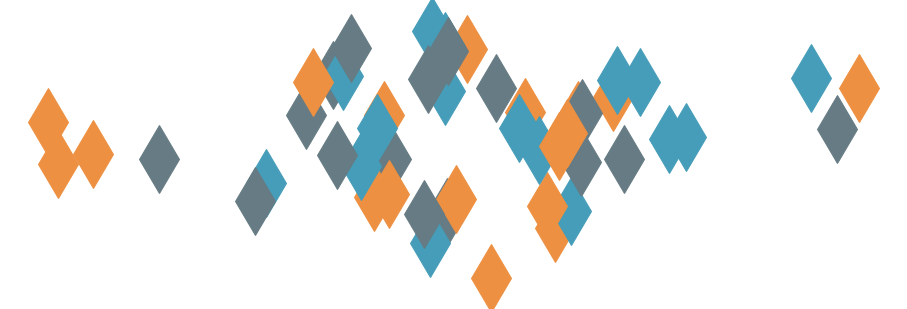

In [15]:
plt.rcParams.update({
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'xtick.major.bottom': False,
    'ytick.major.left': False,
})

our_usual_plot('style7.png');

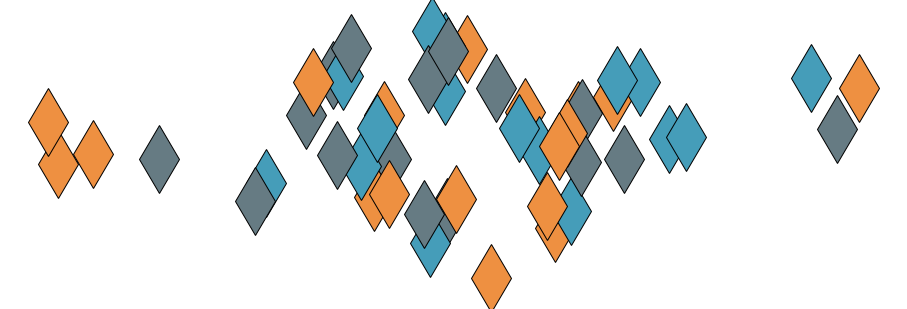

In [16]:
plt.rcParams.update({
    'lines.markeredgecolor': 'black',
})
our_usual_plot('style8.png');

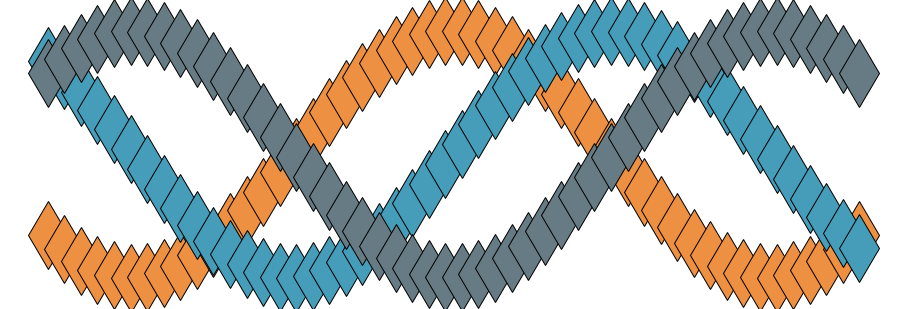

In [17]:
fig, ax = plt.subplots()

x = np.linspace(-4, 4)
ax.plot(x, np.cos(x), clip_on=False)
ax.plot(x, np.sin(x), clip_on=False)
ax.plot(x, -np.cos(x), clip_on=False)

fig.savefig(IMAGE_DIR / 'style9.png')

In [18]:
def confetti(N, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    my_artists = ax.plot(*np.random.randn(N, 2), clip_on=False, **kwargs)
    return my_artists


In [19]:
def solitare(x, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    kwargs.setdefault('clip_on', False)
    my_artists = ax.plot(x, np.cos(x), x, np.sin(x),x, -np.cos(x),
                         **kwargs)
    return my_artists

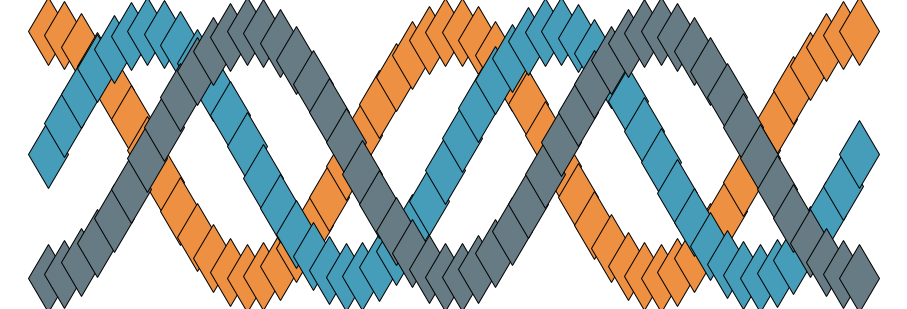

In [20]:
import numpy as np
_ = solitare(np.linspace(-2*np.pi, 2*np.pi))

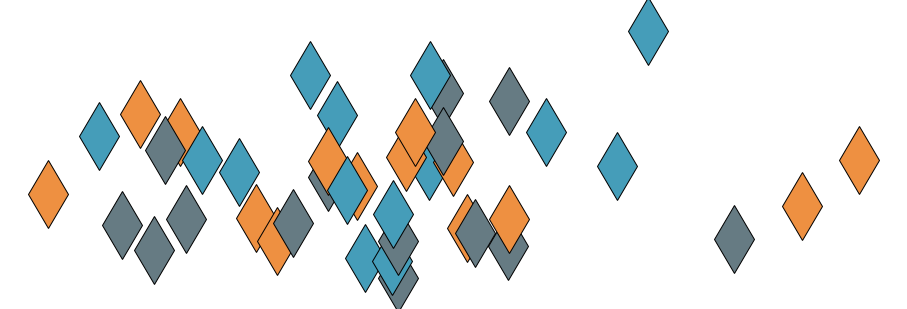

In [21]:
plt.figure()
_ = confetti(42)
plt.savefig(IMAGE_DIR/"sparks.png")

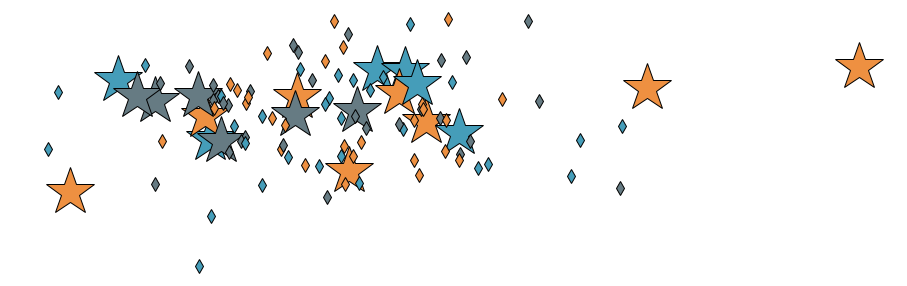

In [22]:
#_ = sparkles(4, markersize=20)
_ = confetti(20, marker='*', markersize=50)
_ = confetti(87, markersize=10)

plt.savefig(IMAGE_DIR/"multisparkles.png")

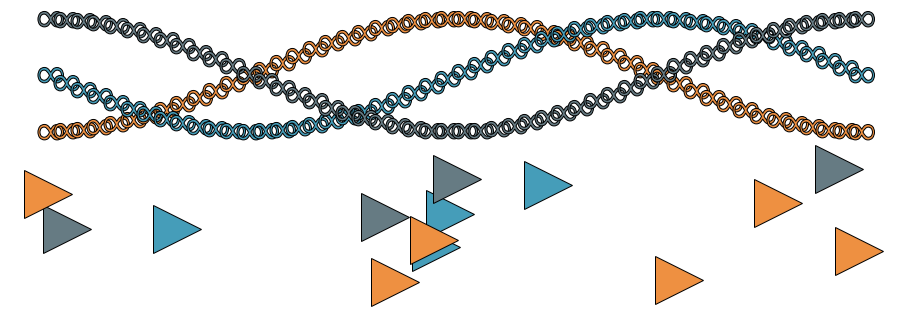

In [23]:
fig, (ax1,ax2) = plt.subplots(nrows=2)
_ = solitare(np.linspace(-np.pi, np.pi), ax=ax1, 
             markersize=30, marker='$\infty$')
_ = confetti(13, ax=ax2, marker='>')
fig.savefig(IMAGE_DIR/"combined_axis.png")

In [24]:
plt.rcParams.update({
     "axes.prop_cycle": plt.cycler("color", ['#000000', '#1b6989', '#e69f00', '#009e73', '#f0e442', '#50b4e9', '#d55e00', '#cc79a7']),
     ...
     'font.family': 'serif',
     'figure.facecolor': '#fffff8',
     'axes.facecolor': '#fffff8',
     'font.size': 14.0,
     'hist.bins': 'auto',
     ...
     'lines.markersize': 8.0, 
})

SyntaxError: invalid syntax (<ipython-input-24-3ce8b6b14386>, line 4)